# Predict Hospital Readmissions

***

## Project Goals

* Create a model to predict whether a patient will get readmitted within 30 days.
* Compare with other classifier models and evaluate using different evaluation metrics.

## Data

* The data was submitted on behalf of the Center for Clinical and Translational Research, Virginia Commonwealth University
* The dataset contains information from 130 US hospitals and integrated delivery networks across 10 years from 1999 to 2008.
* It includes over 50 features representing patient and hospital outcomes, such as patient age, number of medication, time in hospital, etc.

## Analysis
* The following models were used to predict early hospital readmissions: Logistic Regression, K-Nearest Neighbours, Naive Bayes, Decision Tree and Random Forest.
* The following metrics were used to evaluate each model's performance: accuracy, precision, recall and F1 scores.

***

## 1: Import Libraries and Files

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Read CSV file and grab the first 10 rows

file = 'diabetic_data.csv'

df = pd.read_csv(file)

In [3]:
# Take a look at the dataset

pd.set_option('display.max_columns', None)

df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Look at the shape of dataset

df.shape

(101766, 50)

In [5]:
# Look at all the data types

df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

## 2: Preprocess Data

* 2.1: Handling missing information
* 2.2: Handling irrelevant information
* 2.3: Simplifying categories
* 2.4: Reducing number of categories

In [6]:
# Check for null values in dataframe

print(df.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [7]:
# Check for question marks in dataframe

for column in df.columns:
    print(column, df[column][df[column] == '?'].count())

encounter_id 0
patient_nbr 0
race 2273
gender 0
age 0
weight 98569
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40256
medical_specialty 49949
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


### 2.1: Handling Missing Information

* Regarding the weight, payer_code and medical_specialty columns, we've decided to drop these columns because there is an overwhelming amount of missing information (close to 50% or more).
* Regarding the gender column, we removed 3 rows with Unknown/Invalid data.

In [8]:
# Remove the columns with an overwhelming number of question marks

df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

In [9]:
# Examine several columns and see what are the unique values

df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [10]:
# Remove the rows with Unkown/Invalid in gender

df = df[df['gender'] != 'Unknown/Invalid']

df['gender'].value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

### 2.2 Handling Irrelevant Variables

* Diag_2 and diag_3 are dropped because we're only considering primary diagnosis.
* There are patients that have multiple encounters. In order to reduce the bias, we kept the first patient encounter and removed all the other encounters. Encounter_id and patient_nbr columns were then dropped.
* There are 22 columns describing the change in individual medications. We dropped all the columns since there is already one column with regards to medication change on a whole (change).

In [11]:
# Remove diag_2 and diag_3 since we only consider primary diagnosis

df = df.drop(['diag_2', 'diag_3'], axis = 1)

In [12]:
# Remove patient_nbr with multiple encounters

df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

In [13]:
# Remove irrelevant variables 

df = df.drop(['encounter_id', 'patient_nbr'], axis = 1)

In [14]:
# Remove irrelevant variables

meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', \
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'tolazamide', \
        'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', \
        'troglitazone', 'tolbutamide', 'acetohexamide']

df = df.drop(meds, axis = 1)

### 2.3: Simplifying Categories

* Next, we'll encode the age column with the numbers 1 to 10 so that they can still retain their order of ranking.

In [15]:
# Encode age into 1 for 0-10, 2 for 10-20, so on and so forth

age_id = {'[0-10)':1, '[10-20)':2, '[20-30)':3, '[30-40)':4, '[40-50)':5, '[50-60)':6, '[60-70)':7, '[70-80)':8, '[80-90)':9, '[90-100)':10}
df['age'] = df['age'].map(age_id)

### 2.4: Reducing the Number of Categories

* There are 4 columns with too many categories, namely: diag_1, admission_source_id, discharge_disposition_id and admission_source_id.
* We need to reduce the number of categories by grouping them together.
* For diag_1, we can refer to the icd9 codes to generalize an appropriate description.
* For race, we combined 2 categories together: ? and other.

In [16]:
# Convert diag_1 into icd9 descriptions

# Step 1: Change question mark to zero
df['diag_1'] = df['diag_1'].replace('?', 0)

# Step 2: Change strings that start with V or E and prepend 10
df['diag_1'] = pd.to_numeric(df['diag_1'].str.replace(r'(V)|(E)', '10', regex=True))

df['diag_1'].value_counts()

414.0     5232
428.0     3980
786.0     3040
410.0     2902
486.0     2439
          ... 
653.0        1
61.0         1
145.0        1
148.0        1
1051.0       1
Name: diag_1, Length: 696, dtype: int64

In [17]:
# Step 3: Create a function to convert diag_1_int codes into icd9 descriptions

def diagnosis_icd9(df):
    if ((df['diag_1'] >= 359.00) & (df['diag_1'] <= 459.00)) or df['diag_1'] == 785.00:
        return 'A disease of the circulatory system'
    elif (df['diag_1'] >= 250.01) & (df['diag_1'] <= 250.99):
        return 'Diabetes'
    elif ((df['diag_1'] >= 460.00) & (df['diag_1'] <= 519)) or df['diag_1'] == 786.00:
        return 'A disease of the respiratory system'
    elif ((df['diag_1'] >= 520.00) & (df['diag_1'] <= 579.00)) or df['diag_1'] == 787.00:
        return 'Diseases of the digestive system'
    elif (df['diag_1'] >= 800.00) & (df['diag_1'] <= 999.00):
        return 'Injury and poisoning'
    elif (df['diag_1'] >= 710.00) & (df['diag_1'] <= 739.00):
        return 'Diseases of the musculoskeletal system and connective tissue'
    elif ((df['diag_1'] >= 580.00) & (df['diag_1'] <= 629.00)) or df['diag_1'] == 788.00:
        return 'Diseases of the genitourinary system'
    elif (df['diag_1'] >= 140.00) & (df['diag_1'] <= 239.00):
        return 'Neoplasms'
    else:
        return 'Other'

df['diag_1'] = df.apply(diagnosis_icd9, axis=1)

# Step 4: Convert diag_1_id from object to string
df['diag_1'] = df['diag_1'].astype('string')

In [18]:
# Encode admission_type_id into 1 for emergency, 2 for elective, 3 for newborn, 4 for unavailable

admission_type_id = {1:1, 2:1, 3:2, 4:3, 5:4, 6:4, 7:1, 8:4}
df['admission_type_id'] = df['admission_type_id'].map(admission_type_id)

In [19]:
# Encode discharge_disposition_id into 1 for home, 2 for hospital, 3 for Left AMA, 4 for institution, 5 for expired, 
# 6 for unavailable, 7 for facility, 8 for psychatric 

discharge_disposition_id = {1:1, 2:2, 3:2, 4:2, 5:2, 6:1, 7:3, 8:1, 9:1, 10:4, 11:5, 12:4, 13:1, 14:2, 15:4, 16:4, \
                          17:4, 18:6, 19:5, 20:5, 22:2, 23:2, 24:2, 25:6, 27:7, 28:8}
df['discharge_disposition_id'] = df['discharge_disposition_id'].map(discharge_disposition_id)

In [20]:
# Encode admission_source_id into 1 for referral, 2 for hospital, 3 for emergency, 4 for law, 5 for unavailable, 
# 6 for newborn

admission_source_id = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:4, 9:5, 10:2, 11:6, 13:6, 14:6, 17:5, 20:5, 22:2, 25:2}
df['admission_source_id'] = df['admission_source_id'].map(admission_source_id)

In [21]:
# Encode race into 1 for Caucasian, 2 for AfricanAmerican, 3 for Hispanic, 4 for Asian, 5 for other

race_id = {'Caucasian':'Caucasian', 'AfricanAmerican':'AfricanAmerican', 'Hispanic':'Hispanic', 'Asian':'Asian', \
           '?':'Other', 'Other':'Other'}
df['race'] = df['race'].map(race_id)

## 3. Data Exploration

* Since we're only interested in factors leading to early readmission, we will convert readmitted into a binary variable with two classes: 
    * 1 for readmission in less than 30 days (<30)
    * 0 for otherwise which includes no readmission (NO) and readmission in more than 30 days (>30)

In [22]:
# Look at the target feature

df['readmitted'].value_counts()

NO     42982
>30    22240
<30     6293
Name: readmitted, dtype: int64

In [23]:
# Encode readmitted into 0 for NO and >30 and 1 for <30

df['readmitted'] = df.readmitted.apply(lambda x: 0 if x == 'NO' or x == '>30' else 1)

<AxesSubplot: title={'center': 'Distribution of Readmissions'}, xlabel='readmitted', ylabel='Frequency'>

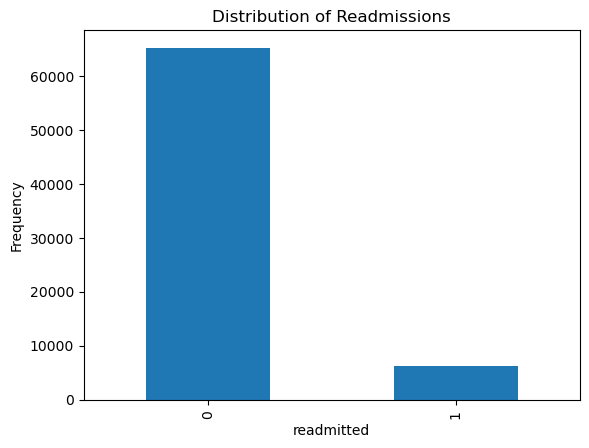

In [24]:
# Plot the distribution of readmissions

df.groupby('readmitted').age.count().plot(kind='bar', title='Distribution of Readmissions', ylabel='Frequency')

In [25]:
# Look at the statistical data

df.describe()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000
mean,7.065161,1.532657,1.502384,2.431448,4.289170,43.075858,1.430525,15.704999,0.280081,0.103545,0.177837,7.245753,0.087996
std,1.597833,0.961682,1.188221,1.152256,2.949188,19.952151,1.759848,8.311201,1.068978,0.509197,0.603801,1.994651,0.283290
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,7.000000,1.000000,1.000000,3.000000,3.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,8.000000,2.000000,2.000000,3.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000,0.000000
max,10.000000,4.000000,8.000000,6.000000,14.000000,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,16.000000,1.000000


## 4. Data Visualization

* Next, we will plot the distribution of each feature/column in relation with the frequency of early admissions.
* We can identify features that are good predictors of early readmissions if the data is sufficiently varied.

Text(0.5, 1.0, 'Readmission Frequency for Race')

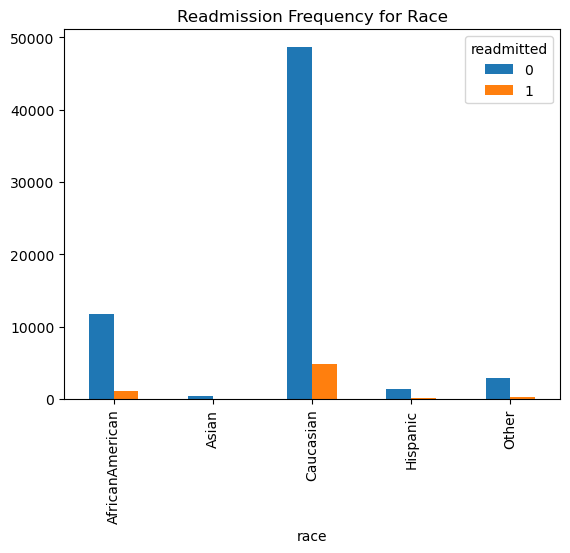

In [26]:
# Plot the distribution of race along with the frequency of early readmissions

pd.crosstab(df.race, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Race')

Text(0.5, 1.0, 'Readmission Frequency for Gender')

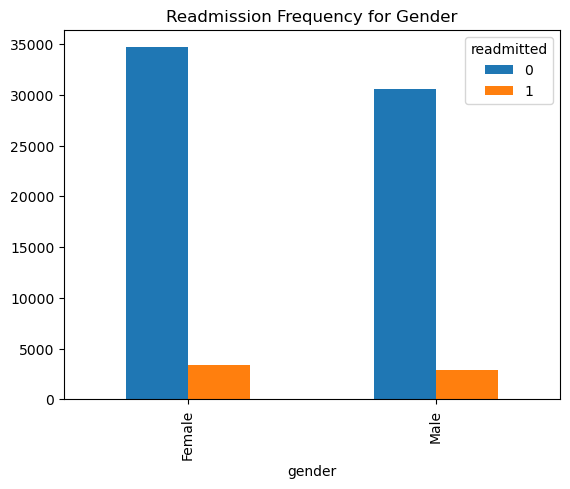

In [27]:
# Plot the distribution of gender along with the frequency of early readmissions

pd.crosstab(df.gender, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Gender')

Text(0.5, 1.0, 'Readmission Frequency for Age Groups')

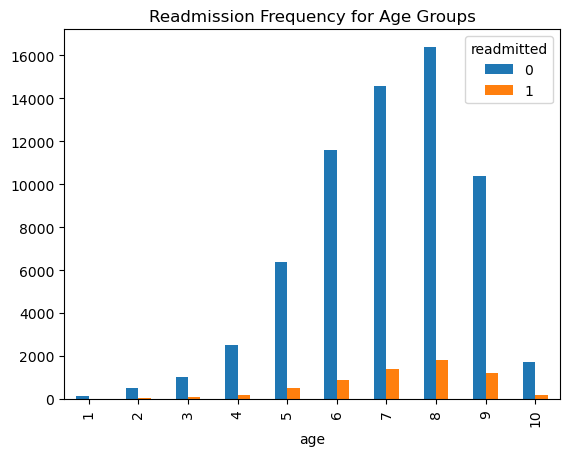

In [28]:
# Plot the distribution of age along with the frequency of early readmissions

pd.crosstab(df.age, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Age Groups')

Text(0.5, 1.0, 'Readmission Frequency for Admission Type ID')

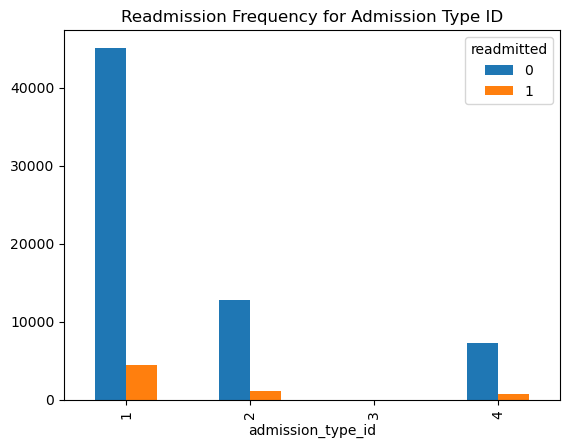

In [29]:
# Plot the distribution of admission type id along with the frequency of early readmissions

pd.crosstab(df.admission_type_id, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Admission Type ID')

Text(0.5, 1.0, 'Readmission Frequency for Discharge Disposition ID')

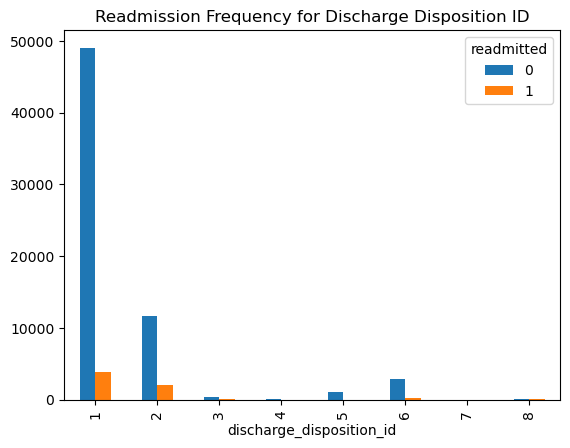

In [30]:
# Plot the distribution of discharge disposition id along with the frequency of early readmissions

pd.crosstab(df.discharge_disposition_id, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Discharge Disposition ID')

Text(0.5, 1.0, 'Readmission Frequency for Admission Source ID')

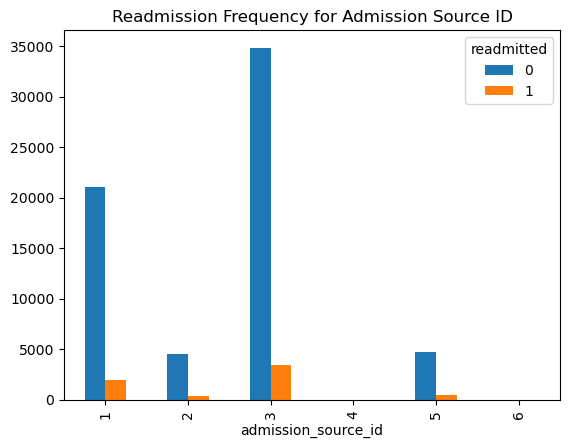

In [31]:
# Plot the distribution of admission source id along with the frequency of early readmissions

pd.crosstab(df.admission_source_id, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Admission Source ID')

Text(0.5, 1.0, 'Readmission Frequency for Time in Hospital')

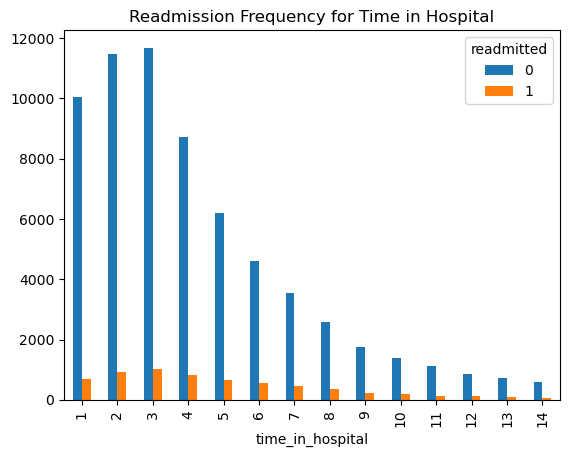

In [32]:
# Plot the distribution of time in hospital along with the frequency of early readmissions

pd.crosstab(df.time_in_hospital, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Time in Hospital')

Text(0.5, 1.0, 'Readmission Frequency for Number of Lab Procedures')

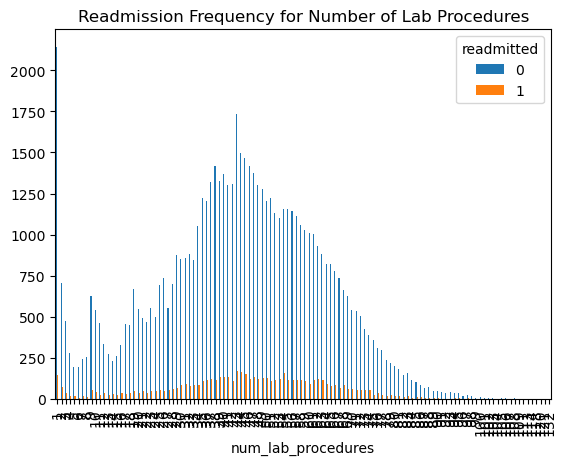

In [33]:
# Plot the distribution of number of lab procedures along with the frequency of early readmissions

pd.crosstab(df.num_lab_procedures, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Number of Lab Procedures')

Text(0.5, 1.0, 'Readmission Frequency for Number of Procedures')

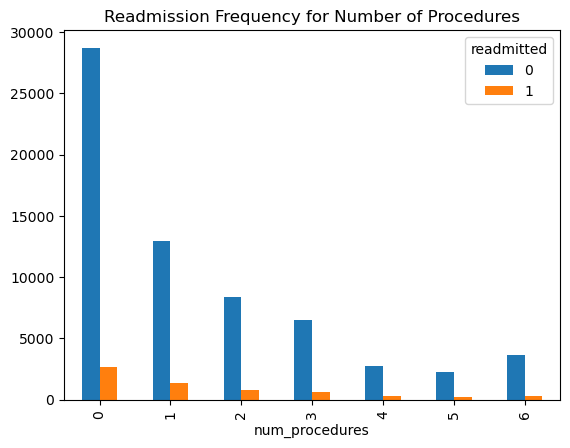

In [34]:
# Plot the distribution of number of procedures along with the frequency of early readmissions

pd.crosstab(df.num_procedures, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Number of Procedures')

Text(0.5, 1.0, 'Readmission Frequency for Number of Medications')

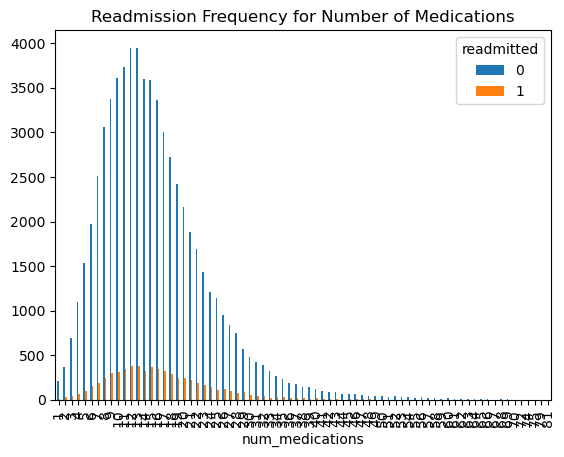

In [35]:
# Plot the distribution of number of medications along with the frequency of early readmissions

pd.crosstab(df.num_medications, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Number of Medications')

Text(0.5, 1.0, 'Readmission Frequency for Number of Outpatients')

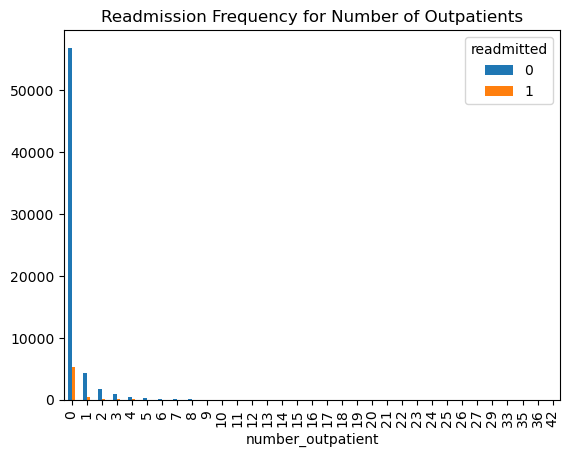

In [36]:
# Plot the distribution of number of outpatient along with the frequency of early readmissions

pd.crosstab(df.number_outpatient, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Number of Outpatients')

Text(0.5, 1.0, 'Readmission Frequency for Number of Emergencies')

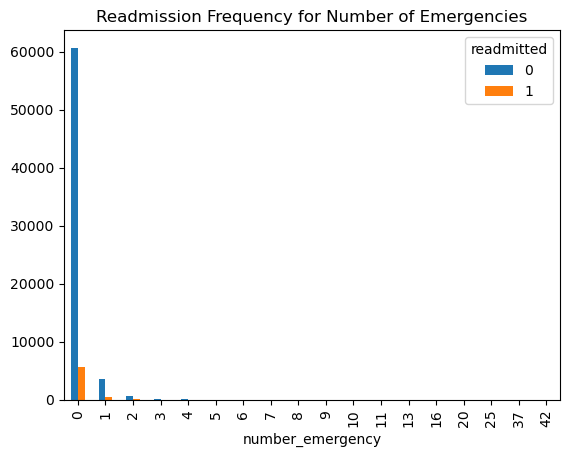

In [37]:
# Plot the distribution of number of emergencies along with the frequency of early readmissions

pd.crosstab(df.number_emergency, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Number of Emergencies')

Text(0.5, 1.0, 'Readmission Frequency for Number of Inpatients')

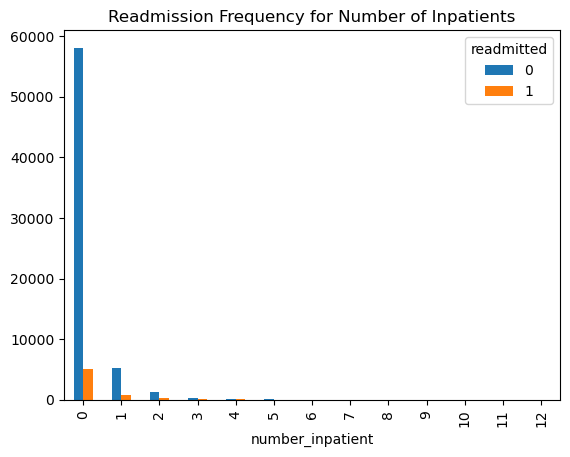

In [38]:
# Plot the distribution of number of inpatient along with the frequency of early readmissions

pd.crosstab(df.number_inpatient, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Number of Inpatients')

Text(0.5, 1.0, 'Readmission Frequency for Primary Diagnosis')

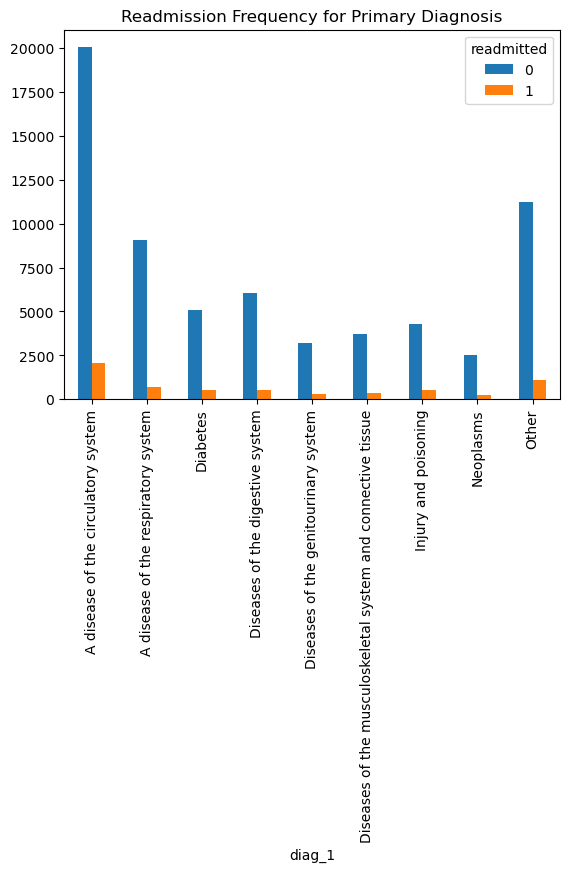

In [39]:
# Plot the distribution of primary diagnosis along with the frequency of early readmissions

pd.crosstab(df.diag_1, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Primary Diagnosis')

Text(0.5, 1.0, 'Readmission Frequency for Number of Diagnoses')

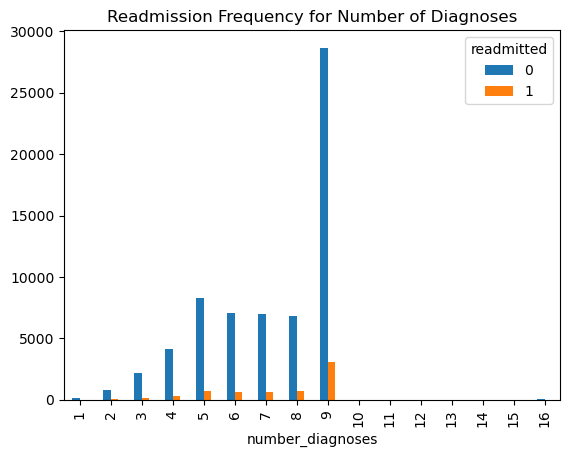

In [40]:
# Plot the distribution of number of diagnoses along with the frequency of early readmissions

pd.crosstab(df.number_diagnoses, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Number of Diagnoses')

Text(0.5, 1.0, 'Readmission Frequency for Glucose Serum Test Results')

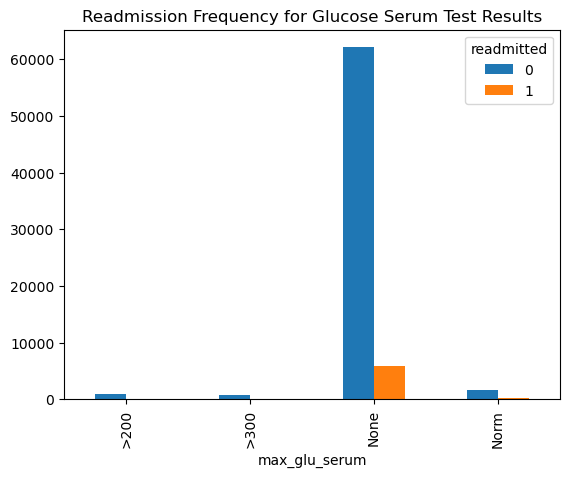

In [41]:
# Plot the distribution of glucose serum test results along with the frequency of early readmissions

pd.crosstab(df.max_glu_serum, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Glucose Serum Test Results')

Text(0.5, 1.0, 'Readmission Frequency for A1C Test Results')

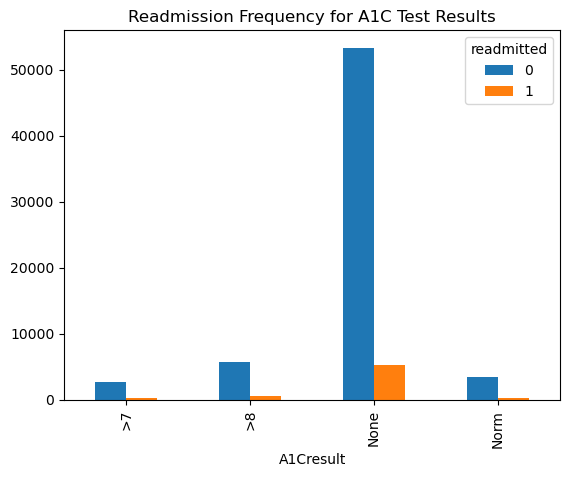

In [42]:
# Plot the distribution of A1C test results along with the frequency of early readmissions

pd.crosstab(df.A1Cresult, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for A1C Test Results')

Text(0.5, 1.0, 'Readmission Frequency for Change of Medications')

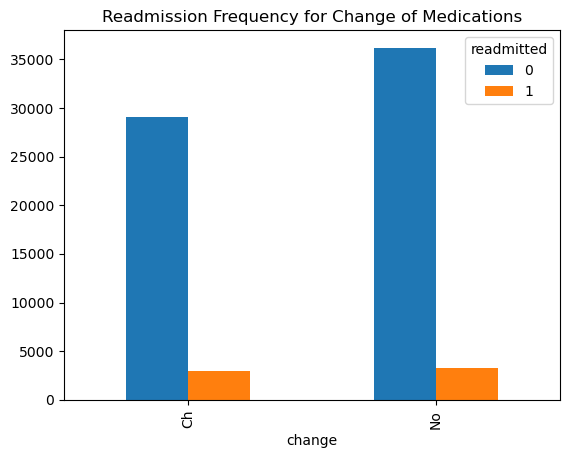

In [43]:
# Plot the distribution of change of medications along with the frequency of early readmissions

pd.crosstab(df.change, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Change of Medications')

Text(0.5, 1.0, 'Readmission Frequency for Diabetes Medications')

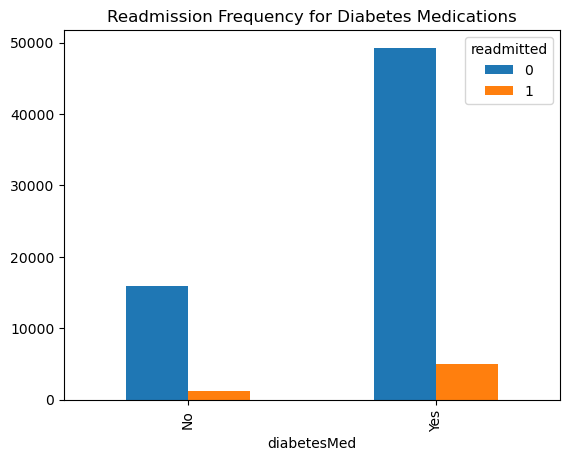

In [44]:
# Plot the distribution of diabetes medications along with the frequency of early readmissions

pd.crosstab(df.diabetesMed, df.readmitted).plot(kind='bar')
plt.title('Readmission Frequency for Diabetes Medications')

#### Observations

* Features that might be good predictors: race, age, admission type ID, discharge disposition ID, admission source ID, time in hospital, number of lab procedures, number of procedures, number of medications, number of outpatients, number of emergencies, number of inpatients, primary diagnosis, number of diagnoses, glucose serum test results, A1C test results, Diabetes medication.
* Features that might not be good predictors: gender, change.

## 5. Feature Engineering

* 5.1: Create Dummy Variables
* 5.2: SMOTE

### 5.1: Create Dummy Variables

* When dealing with categorical variables, we need to assign numerical values to different categories within each column. 
* Dummy variables helps us classify the data into mutually exclusive categories

In [45]:
# Get dummy variables for categorical variables

df = pd.get_dummies(df, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', \
                                    'diag_1', 'max_glu_serum','A1Cresult','change','diabetesMed'])

In [46]:
# Check all the columns within the dataframe

df.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'gender_Female', 'gender_Male', 'admission_type_id_1',
       'admission_type_id_2', 'admission_type_id_3', 'admission_type_id_4',
       'discharge_disposition_id_1', 'discharge_disposition_id_2',
       'discharge_disposition_id_3', 'discharge_disposition_id_4',
       'discharge_disposition_id_5', 'discharge_disposition_id_6',
       'discharge_disposition_id_7', 'discharge_disposition_id_8',
       'admission_source_id_1', 'admission_source_id_2',
       'admission_source_id_3', 'admission_source_id_4',
       'admission_source_id_5', 'admission_source_id_6',
       'diag_1_A disease of the circulatory system',
       'diag_1_A disease of the respiratory system', 'diag_1_Diabetes',
  

In [47]:
# Look at the feature set

feature_set = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', \
                'number_emergency', 'number_inpatient', 'number_diagnoses', 'race_AfricanAmerican', \
                'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Female', 'gender_Male', \
                'admission_type_id_1', 'admission_type_id_2', 'admission_type_id_3', 'admission_type_id_4', \
                'discharge_disposition_id_1', 'discharge_disposition_id_2', 'discharge_disposition_id_3', \
                'discharge_disposition_id_4', 'discharge_disposition_id_5', 'discharge_disposition_id_6', \
                'discharge_disposition_id_7', 'discharge_disposition_id_8', 'admission_source_id_1', 'admission_source_id_2', \
                'admission_source_id_3', 'admission_source_id_4', 'admission_source_id_5', 'admission_source_id_6', \
                'diag_1_A disease of the circulatory system', 'diag_1_A disease of the respiratory system', 'diag_1_Diabetes', \
                'diag_1_Diseases of the digestive system', 'diag_1_Diseases of the genitourinary system', \
                'diag_1_Diseases of the musculoskeletal system and connective tissue', 'diag_1_Injury and poisoning', \
                'diag_1_Neoplasms', 'diag_1_Other', 'max_glu_serum_>200', 'max_glu_serum_>300', 'max_glu_serum_None', \
                'max_glu_serum_Norm', 'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'change_Ch', \
                'change_No', 'diabetesMed_No', 'diabetesMed_Yes']

In [48]:
# Set the x and y variables

x = df[feature_set]
y = df['readmitted']

In [49]:
# Split into 70% training data and 30% testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

### 5.2: SMOTE

* Since the two readmission classes are heavily imbalanced, we need to use an oversampling method to balance the class distributions.
* We will use Synthetic Minority Oversampling Technique (SMOTE), which randomly replicates minority instances in order to balance class distributions.

In [50]:
# Use SMOTE only on the training set

from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state = 20)

x_train_sm, y_train  = sm.fit_resample(x_train, y_train)

In [51]:
# Compare the dataset shape

print('Original dataset shape {}'.format(Counter(y)))

print('New dataset shape {}'.format(Counter(y_train)))

Original dataset shape Counter({0: 65222, 1: 6293})
New dataset shape Counter({1: 45632, 0: 45632})


## 6: Logistic Regression

In [52]:
# Import and initiate logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l2', class_weight = 'balanced', random_state = 0, solver = 'newton-cholesky')

In [53]:
# Train the logistic regression

lr.fit(x_train_sm, y_train)

LogisticRegression(class_weight='balanced', random_state=0,
                   solver='newton-cholesky')

In [54]:
# Print out the confusion matrix

from sklearn.metrics import confusion_matrix

threshold = 0.5
y_pred = (lr.predict_proba(x_test)[:, 1] > threshold).astype('float')

print('Confusion Matrix: ')
confusion_matrix(y_test, y_pred)

Confusion Matrix: 


array([[19576,    14],
       [ 1858,     7]])

In [55]:
# Print out crosstabulation

pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(y_pred, name = 'Predict'), margins = True)

Predict,0.0,1.0,All
Actual,,,
0,4307,7,4314
1,491,0,491
All,4798,7,4805


In [56]:
# Print accuracy, precision, recall and F1 score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_acc = accuracy_score(y_test, y_pred)
lr_pre = precision_score(y_test, y_pred)
lr_rec = recall_score(y_test, y_pred)
lr_fsc = f1_score(y_test, y_pred)

print("Accuracy is {0:.2f}".format(lr_acc))
print("Precision is {0:.2f}".format(lr_pre))
print("Recall is {0:.2f}".format(lr_rec))
print("F1 Score is {0:.2f}".format(lr_fsc))

Accuracy is 0.91
Precision is 0.33
Recall is 0.00
F1 Score is 0.01


## 7: K-Nearest Neighbours

In [57]:
# Import and initiate KNN

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 20)

In [58]:
# Train the K-nearest neighbours 

kn.fit(x_train_sm, y_train)

KNeighborsClassifier(n_neighbors=20)

In [59]:
# Print out the confusion matrix

from sklearn.metrics import confusion_matrix

threshold = 0.5
y_pred = (kn.predict_proba(x_test)[:, 1] > threshold).astype('float')

print('Confusion Matrix: ')
confusion_matrix(y_test, y_pred)

Confusion Matrix: 


array([[11154,  8436],
       [  974,   891]])

In [60]:
# Print accuracy, precision, recall and F1 score

kn_acc = accuracy_score(y_test, y_pred)
kn_pre = precision_score(y_test, y_pred)
kn_rec = recall_score(y_test, y_pred)
kn_fsc = f1_score(y_test, y_pred)

print("Accuracy is {0:.2f}".format(kn_acc))
print("Precision is {0:.2f}".format(kn_pre))
print("Recall is {0:.2f}".format(kn_rec))
print("F1 Score is {0:.2f}".format(kn_fsc))

Accuracy is 0.56
Precision is 0.10
Recall is 0.48
F1 Score is 0.16


## 8: Naive Bayes

In [61]:
# Import and initiate naive bayes

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [62]:
# Train the naive bayes

nb.fit(x_train_sm, y_train)

MultinomialNB()

In [63]:
# Print out the confusion matrix

from sklearn.metrics import confusion_matrix

threshold = 0.5
y_pred = (nb.predict_proba(x_test)[:, 1] > threshold).astype('float')

print('Confusion Matrix: ')
confusion_matrix(y_test, y_pred)

Confusion Matrix: 


array([[15657,  3933],
       [ 1346,   519]])

In [64]:
# Print accuracy, precision, recall and F1 score

nb_acc = accuracy_score(y_test, y_pred)
nb_pre = precision_score(y_test, y_pred)
nb_rec = recall_score(y_test, y_pred)
nb_fsc = f1_score(y_test, y_pred)

print("Accuracy is {0:.2f}".format(nb_acc))
print("Precision is {0:.2f}".format(nb_pre))
print("Recall is {0:.2f}".format(nb_rec))
print("F1 Score is {0:.2f}".format(nb_fsc))

Accuracy is 0.75
Precision is 0.12
Recall is 0.28
F1 Score is 0.16


## 9: Decision Tree Classifier

In [65]:
# Import and initiate decision tree 

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=3)

In [66]:
# Train the decision tree 

dt.fit(x_train_sm, y_train)

DecisionTreeClassifier(max_depth=3)

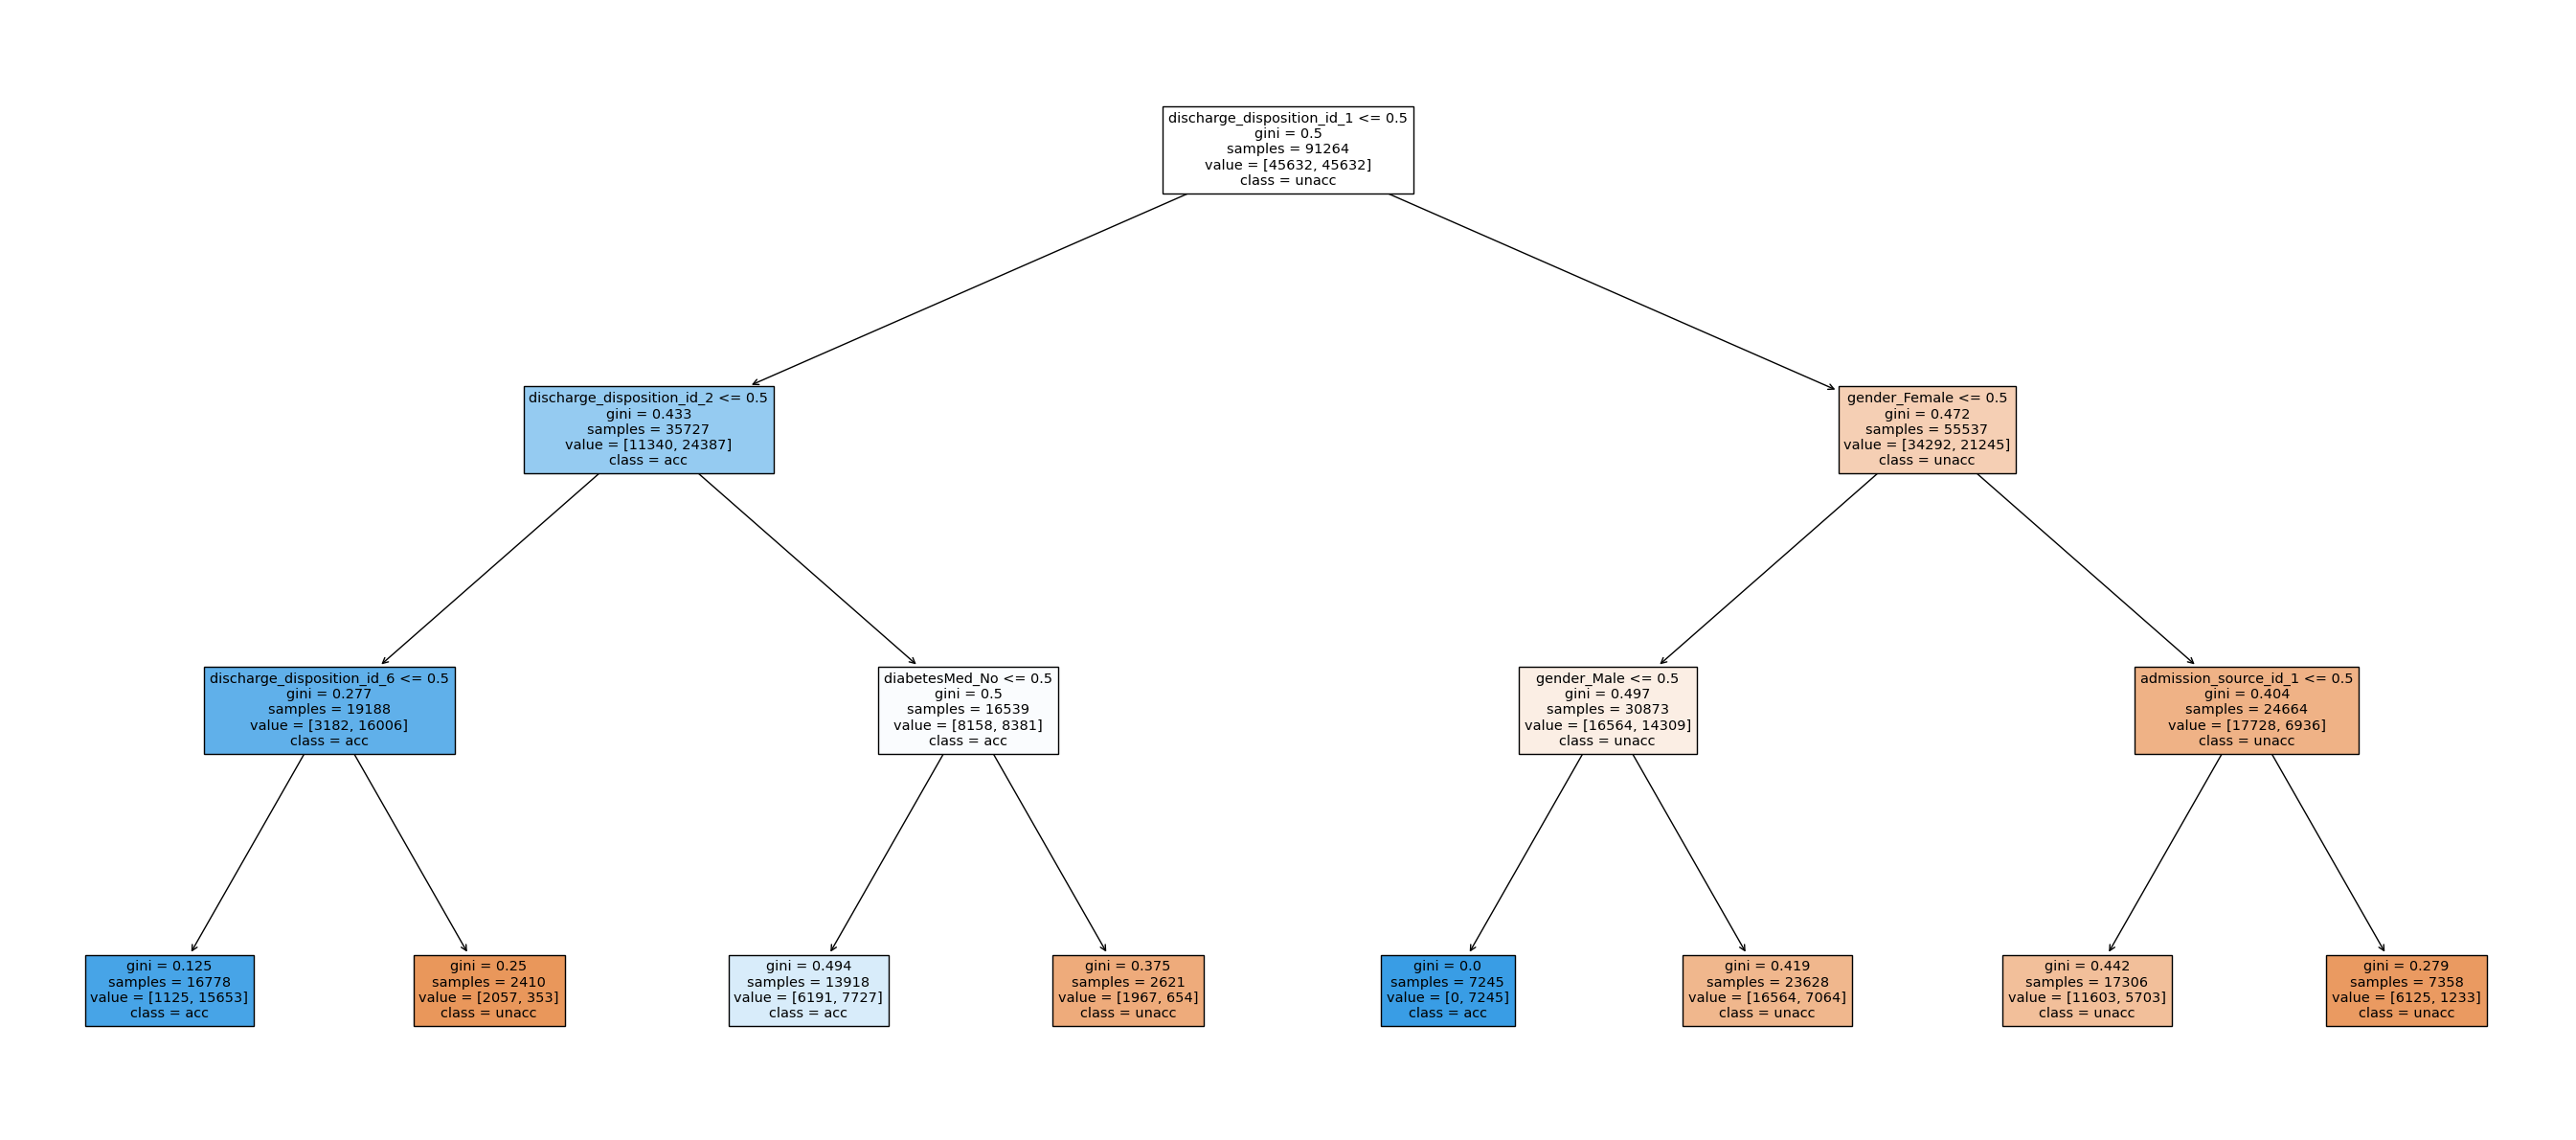

In [67]:
# Plot the decision tree

plt.figure(figsize=(27,12))
tree.plot_tree(dt, feature_names = x_train.columns, class_names = ['unacc','acc'], filled = True)
plt.tight_layout()
plt.show()

In [68]:
# Text-based visualization of the decision tree

print(tree.export_text(dt, feature_names = x_train.columns.tolist()))

|--- discharge_disposition_id_1 <= 0.50
|   |--- discharge_disposition_id_2 <= 0.50
|   |   |--- discharge_disposition_id_6 <= 0.50
|   |   |   |--- class: 1
|   |   |--- discharge_disposition_id_6 >  0.50
|   |   |   |--- class: 0
|   |--- discharge_disposition_id_2 >  0.50
|   |   |--- diabetesMed_No <= 0.50
|   |   |   |--- class: 1
|   |   |--- diabetesMed_No >  0.50
|   |   |   |--- class: 0
|--- discharge_disposition_id_1 >  0.50
|   |--- gender_Female <= 0.50
|   |   |--- gender_Male <= 0.50
|   |   |   |--- class: 1
|   |   |--- gender_Male >  0.50
|   |   |   |--- class: 0
|   |--- gender_Female >  0.50
|   |   |--- admission_source_id_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- admission_source_id_1 >  0.50
|   |   |   |--- class: 0



In [69]:
# Print out the confusion matrix

from sklearn.metrics import confusion_matrix

threshold = 0.5
y_pred = (dt.predict_proba(x_test)[:, 1] > threshold).astype('float')

print('Confusion Matrix: ')
confusion_matrix(y_test, y_pred)

Confusion Matrix: 


array([[16502,  3088],
       [ 1363,   502]])

In [70]:
# Print accuracy, precision, recall and F1 score

dt_acc = accuracy_score(y_test, y_pred)
dt_pre = precision_score(y_test, y_pred)
dt_rec = recall_score(y_test, y_pred)
dt_fsc = f1_score(y_test, y_pred)

print("Accuracy is {0:.2f}".format(dt_acc))
print("Precision is {0:.2f}".format(dt_pre))
print("Recall is {0:.2f}".format(dt_rec))
print("F1 Score is {0:.2f}".format(dt_fsc))

Accuracy is 0.79
Precision is 0.14
Recall is 0.27
F1 Score is 0.18


## 10: Random Forest Classifier

In [71]:
# Import and initiate random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 6,  n_estimators = 10, max_features = 10, random_state = 25)

In [72]:
# Train the random forest 

rf.fit(x_train_sm, y_train)

RandomForestClassifier(max_depth=6, max_features=10, n_estimators=10,
                       random_state=25)

In [73]:
# Print out the confusion matrix

from sklearn.metrics import confusion_matrix

threshold = 0.5
y_pred = (rf.predict_proba(x_test)[:, 1] > threshold).astype('float')

print('Confusion Matrix: ')
confusion_matrix(y_test, y_pred)

Confusion Matrix: 


array([[17978,  1612],
       [ 1629,   236]])

In [74]:
# Print accuracy, precision, recall and F1 score

rf_acc = accuracy_score(y_test, y_pred)
rf_pre = precision_score(y_test, y_pred)
rf_rec = recall_score(y_test, y_pred)
rf_fsc = f1_score(y_test, y_pred)

print("Accuracy is {0:.2f}".format(rf_acc))
print("Precision is {0:.2f}".format(rf_pre))
print("Recall is {0:.2f}".format(rf_rec))
print("F1 Score is {0:.2f}".format(rf_fsc))

Accuracy is 0.85
Precision is 0.13
Recall is 0.13
F1 Score is 0.13


## 11: Model Evaluation

* Now that we've trained all five models, we will compare their performance using the following metrics: accuracy, precision, recall and F1 scores.

                 Models  Accuracy  Precision    Recall  F1 Score
0   Logistic Regression  0.912748   0.333333  0.003753  0.007423
1  K-Nearest Neighbours  0.561408   0.095529  0.477748  0.159221
2           Naive Bayes  0.753950   0.116577  0.278284  0.164319
3         Decision Tree  0.792543   0.139833  0.269169  0.184051
4         Random Forest  0.848940   0.127706  0.126542  0.127121


<AxesSubplot: title={'center': 'Evaluating Classifier Models: Accuracy, Precision, Recall and F1 Scores'}, xlabel='Models'>

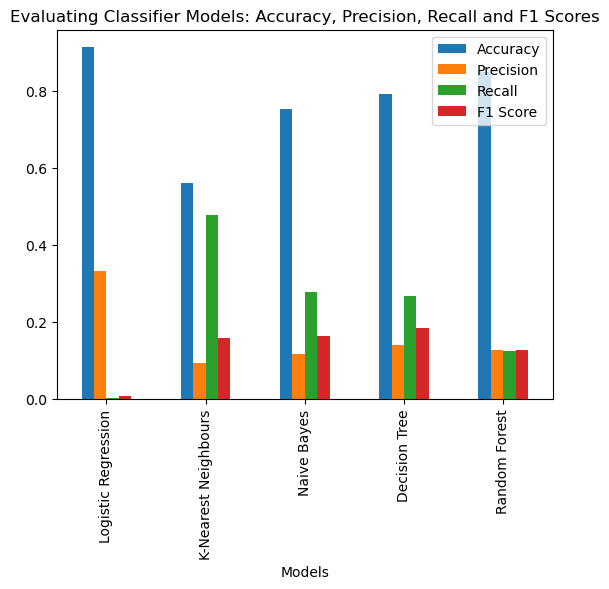

In [75]:
# Put data into a dataframe
df = pd.DataFrame([['Logistic Regression', lr_acc, lr_pre, lr_rec, lr_fsc], \
                   ['K-Nearest Neighbours', kn_acc, kn_pre, kn_rec, kn_fsc], \
                   ['Naive Bayes', nb_acc, nb_pre, nb_rec, nb_fsc], \
                   ['Decision Tree', dt_acc, dt_pre, dt_rec, dt_fsc], \
                   ['Random Forest', rf_acc, rf_pre, rf_rec, rf_fsc]], \
                   columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
# View data
print(df)
  
# Plot grouped bar chart
df.plot(x = 'Models',
        kind = 'bar',
        stacked = False,
        title = 'Evaluating Classifier Models: Accuracy, Precision, Recall and F1 Scores')

#### Observations:

* Logistic Regression has the highest accuracy and precision scores, but recall and F1 scores are close to zero.
* K-Nearest Neighbours has the highest recall score, but accuracy and precision are lower compared to other models.
* Decision Tree Classifier has the highest F1-score and its precision and recall scores are higher than majority of the models.

## 12: Conclusion

* Overall, we created five classifier models to predict whether patients will be readmitted to hospitals within 30 days.
* We also used several evaluation metrics to compare the models' performance, of which the Decision Tree Classifier appears to be the most balanced.
* In order to select the best classifier model, further research must be done on feature importance and hyperparameter tuning. Different metrics can also be taken into consideration like Area Under ROC Curve (AUC). 